#  Obtaining data

## Stakeholder Requirements

Our stakeholder's **most valuable asset** is **time**.  They need to purchase a home and be able to flip it **quickly**, while **keeping costs low**. 

The home also needs to be able to **sell just as speedily**.  Therefore, the **area around the home** must be **enticing** enough to attract buyers.

With these things in mind, we'll need to determine what features of a home to look into when buying, what **system** can they use to **measure their progress**, and where to find these homes.

We'll explore the relationship between a house's condition and the grade given by King County, as well as find a way to cross reference data and find the best place to search for homes.  We'll also be looking for predictors that impact house prices the most and whether or not it is something that can be improved upon (for example, you can fix up the interior/exterior of the home, but you can't change the zip code it is in).

## Import Data

Time to import the necessary libraries and initialize a data frame containing the data from the CSV file.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import stats
import statsmodels.stats.api as sms

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('csv_files/kc_house_data.csv')
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


* **Missing** data in **'waterfront'**, **'view'**, and **'yr_renovated'**
* **'date'** and **'sq_ft_basement'** have been **typed as objects**

# Scrubbing Data

## Waterfront

In [3]:
print(df.waterfront.value_counts())
waterfront = df[df['waterfront'] == 1.0]
waterfront['price'].describe()

0.0    19075
1.0      146
Name: waterfront, dtype: int64


count    1.460000e+02
mean     1.717215e+06
std      1.145385e+06
min      2.850000e+05
25%      8.275000e+05
50%      1.510000e+06
75%      2.282500e+06
max      7.060000e+06
Name: price, dtype: float64

In [4]:
# Looked at low end prices of waterfront properties out of curiousity.
# waterfront will play a significant role in price.  Replacing NaN's with 
# median
df.waterfront.fillna(df['waterfront'].median(), inplace=True)
df.waterfront.isna().sum()

0

In [5]:
# making dummies
wtr_dummies = pd.get_dummies(df['waterfront'],prefix='waterfront')
df = pd.concat([df, wtr_dummies], axis=1)


In [6]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   date            21597 non-null  object 
 2   price           21597 non-null  float64
 3   bedrooms        21597 non-null  int64  
 4   bathrooms       21597 non-null  float64
 5   sqft_living     21597 non-null  int64  
 6   sqft_lot        21597 non-null  int64  
 7   floors          21597 non-null  float64
 8   waterfront      21597 non-null  float64
 9   view            21534 non-null  float64
 10  condition       21597 non-null  int64  
 11  grade           21597 non-null  int64  
 12  sqft_above      21597 non-null  int64  
 13  sqft_basement   21597 non-null  object 
 14  yr_built        21597 non-null  int64  
 15  yr_renovated    17755 non-null  float64
 16  zipcode         21597 non-null  int64  
 17  lat             21597 non-null 

In [7]:
#fixing dummy datatypes

for col in df.columns:
    if df[col].dtype == df['waterfront_1.0'].dtype:
        df[col] = df[col].astype(int)
df['waterfront_0.0'].dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   date            21597 non-null  object 
 2   price           21597 non-null  float64
 3   bedrooms        21597 non-null  int64  
 4   bathrooms       21597 non-null  float64
 5   sqft_living     21597 non-null  int64  
 6   sqft_lot        21597 non-null  int64  
 7   floors          21597 non-null  float64
 8   waterfront      21597 non-null  float64
 9   view            21534 non-null  float64
 10  condition       21597 non-null  int64  
 11  grade           21597 non-null  int64  
 12  sqft_above      21597 non-null  int64  
 13  sqft_basement   21597 non-null  object 
 14  yr_built        21597 non-null  int64  
 15  yr_renovated    17755 non-null  float64
 16  zipcode         21597 non-null  int64  
 17  lat             21597 non-null 

In [8]:
df2 = df.drop(['waterfront'], axis=1)
df2 = df2.rename(columns={'waterfront_0.0':'waterfront_N',
                         'waterfront_1.0':'waterfront_Y'})
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'waterfront_N', 'waterfront_Y'],
      dtype='object')

## Yr_renovated

In [9]:
# Checking out yr_renovated  ***Take deeper look into this***
df2.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [10]:
# Since having data about renovated homes might be useful, filling NaN's with
# median
df2.yr_renovated.fillna(df2['yr_renovated'].median())

0           0.0
1        1991.0
2           0.0
3           0.0
4           0.0
          ...  
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Length: 21597, dtype: float64

### Is It Categorical? 

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

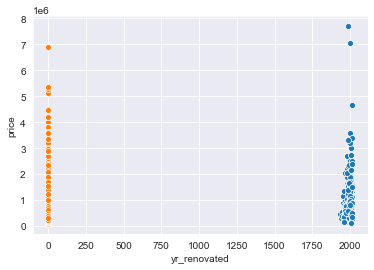

In [11]:
# checking the impact of homes renovated versus not renovated against price

no_reno = df2[df2['yr_renovated'] == 0]

reno = df2[df2['yr_renovated'] != 0]

sns.scatterplot(x=reno['yr_renovated'], y=reno['price'])
sns.scatterplot(x=no_reno['yr_renovated'], y=no_reno['price'])

The columns 'yr_renovated' is **categorical** so we'll alter data frame to represent this. Renovated homes will be represented by a 1 and non-renovated homes will be represented by a 0.

In [12]:
for i in range(len(df['yr_renovated'])):
    if df2['yr_renovated'].iloc[i] != 0.0:
        df2['yr_renovated'].iloc[i] = 1.0
# change name to just renovated
df2 = df2.rename(columns={'yr_renovated' : 'renovated'})

In [13]:
# Changing to catagorical
df2['renovated'] = df2['renovated'].astype('category')

In [14]:
# making dummies
ren_dummies = pd.get_dummies(df2['renovated'],prefix='renovated')
df2 = pd.concat([df2, ren_dummies], axis=1)
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'waterfront_N', 'waterfront_Y',
       'renovated_0.0', 'renovated_1.0'],
      dtype='object')

In [15]:
# changing dummy names
df2 = df2.rename(columns={'renovated_0.0':'not_renovated',
                         'renovated_1.0':'is_renovated'})
df2 = df2.drop('renovated', axis=1)

## Yr_built

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

Number of null values:
0


<AxesSubplot:>

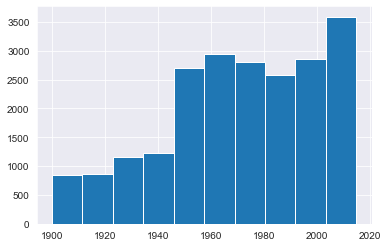

In [16]:
#viewing data values, checking for placeholders

print(df2.yr_built.value_counts())
print("\nNumber of null values:")
print(df2.yr_built.isnull().sum())
df2.yr_built.hist()

In [17]:
# label-encoding so we don't flood the models with dummies
df2['yr_built'] = df2['yr_built'].astype('category')
df2['yr_built'] = df2.yr_built.cat.codes
df2['yr_built'].value_counts()

114    559
106    453
105    450
104    433
103    420
      ... 
33      30
1       29
2       27
35      24
34      21
Name: yr_built, Length: 116, dtype: int64

## Floors

Looking for placeholder values

In [18]:
df2.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

Text(0, 0.5, 'value counts')

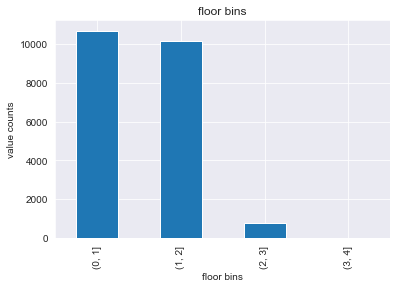

In [19]:
# even though there are half-values, these are split-level homes.
# treating them as categorical; using the binning method.

bins = [0, 1, 2, 3, 4]
bin_flr = pd.cut(df2['floors'], bins)
bin_flr = bin_flr.cat.as_ordered()

bin_flr.value_counts().plot(kind='bar')
plt.title('floor bins')
plt.xlabel('floor bins')
plt.ylabel('value counts')

In [20]:
# now to afix this to our data frame and create dummies
df2['floors'] = bin_flr
df2['floors'] = df2['floors'].cat.codes

# Creating dummies
#keeping first column so future names make sense

flrbin_dummies = pd.get_dummies(bin_flr, prefix='floors') 


df2 = df2.drop(['floors'], axis=1)
df2 = pd.concat([df2, flrbin_dummies], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int8   
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  waterf

In [21]:
# renaming dummies
df2 = df2.rename(columns={'floors_(0, 1]':'floors_1', 
                          'floors_(1, 2]':'floors_2', 
                          'floors_(2, 3]':'floors_3', 
                          'floors_(3, 4]':'floors_3_half'})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int8   
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  waterf

In [22]:
# fixing data types

for col in df2.columns:
    if df2[col].dtype == df2['floors_3_half'].dtype:
        df2[col] = df2[col].astype(int)
df2['floors_2'].dtype

dtype('int32')

## View

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
waterfront_N      0
waterfront_Y      0
not_renovated     0
is_renovated      0
floors_1          0
floors_2          0
floors_3          0
floors_3_half     0
dtype: int64


<AxesSubplot:>

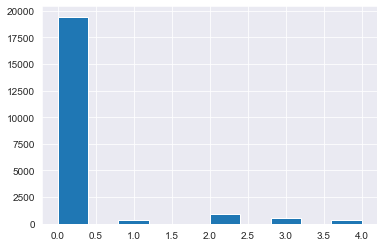

In [23]:
# view column refers to how many times the home has been viewed
print(df2.view.value_counts())
print(df2.isnull().sum())
df2.view.hist()

In [24]:
# checking the median value
med_vu = df2.view.median()
med_vu

0.0

In [25]:
# Only makes up 0.29% of total data, fill with median.
df2.fillna(value=med_vu, inplace=True)
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,...,sqft_living15,sqft_lot15,waterfront_N,waterfront_Y,not_renovated,is_renovated,floors_1,floors_2,floors_3,floors_3_half
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,0.0,3,7,...,1340,5650,1,0,1,0,1,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,0.0,3,7,...,1690,7639,1,0,0,1,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,0.0,3,6,...,2720,8062,1,0,0,1,1,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,0.0,5,7,...,1360,5000,1,0,1,0,1,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,0.0,3,8,...,1800,7503,1,0,1,0,1,0,0,0


In [26]:
# Since homes that have not been viewed far exceeds the number of homes viewed
# we'll split this into 2 categories of have and have not been viewed

for i in range(len(df['view'])):
    if df2['view'].iloc[i] != 0.0:
        df2['view'].iloc[i] = 1.0
df2.view.value_counts()


0.0    19485
1.0     2112
Name: view, dtype: int64

In [27]:
# making dummies
vu_dummies = pd.get_dummies(df2['view'],prefix='view')
df2 = pd.concat([df2, vu_dummies], axis=1)
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'waterfront_N', 'waterfront_Y', 'not_renovated', 'is_renovated',
       'floors_1', 'floors_2', 'floors_3', 'floors_3_half', 'view_0.0',
       'view_1.0'],
      dtype='object')

In [28]:
# changing dummy names
df2 = df2.rename(columns={'view_0.0':'not_viewed',
                         'view_1.0':'viewed'})
df2 = df2.drop('view', axis=1)

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int8   
 12  zipcode        21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
 17  waterfront_N   21597 non-null  int32  
 18  waterf

To save time, we'll fix the data types when we finish making dummy variables. 

## Date

In [30]:
# Time to deal with object types.
import datetime as dt
df2.date.head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [31]:
# convert 'date' to datetime, then creating 2 new columns so that we can work
# with numerical data
df2.date = pd.to_datetime(df['date'])
df2['month'] = df2['date'].dt.month
df2['day_of_year'] = df2['date'].dt.dayofyear

In [32]:
# converting day of year to category
# label encoding
df2['day_of_year'] = df2['day_of_year'].astype('category')
df2['day_of_year'] = df2.day_of_year.cat.codes

## Sqft_Basement

In [33]:
# inspecting sqft_basement values
df2['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
65.0          1
2180.0        1
518.0         1
2120.0        1
20.0          1
Name: sqft_basement, Length: 304, dtype: int64

In [34]:
# 452 values of '?'. Makes up 2.1% of our data. Replace with median value.
med_bsmt = df2[df2['sqft_basement'] != '?']
med = med_bsmt.sqft_basement.median()

for i in range(len(df['sqft_basement'])):
    if df2['sqft_basement'].iloc[i] == '?':
        df2['sqft_basement'].iloc[i] = str(med)


df2.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
2120.0        1
518.0         1
2180.0        1
65.0          1
20.0          1
Name: sqft_basement, Length: 303, dtype: int64

In [35]:
# convert to float
df2['sqft_basement'] = df2.sqft_basement.astype(float)
df2.sqft_basement.dtype

dtype('float64')

In [36]:
# creating a new column that will represent whether or not a home has a 
# basement
df2['basement'] = np.nan

for i in range(len(df2['sqft_basement'])):
    if df2['sqft_basement'].iloc[i] != 0.0:
        df2['basement'].iloc[i] = 1
    else:
        df2['basement'].iloc[i] = 0
        
df2.basement.head()

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: basement, dtype: float64

In [37]:
# making dummies
bsm_dummies = pd.get_dummies(df2['basement'],prefix='basement')
df2 = pd.concat([df2, bsm_dummies], axis=1)
df2.columns



Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'waterfront_N', 'waterfront_Y', 'not_renovated', 'is_renovated',
       'floors_1', 'floors_2', 'floors_3', 'floors_3_half', 'not_viewed',
       'viewed', 'month', 'day_of_year', 'basement', 'basement_0.0',
       'basement_1.0'],
      dtype='object')

In [38]:
# changing dummy names
df2 = df2.rename(columns={'basement_0.0':'no_basement',
                         'basement_1.0':'has_basement'})
df2 = df2.drop('basement', axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   condition      21597 non-null  int64         
 8   grade          21597 non-null  int64         
 9   sqft_above     21597 non-null  int64         
 10  sqft_basement  21597 non-null  float64       
 11  yr_built       21597 non-null  int8          
 12  zipcode        21597 non-null  int64         
 13  lat            21597 non-null  float64       
 14  long           21597 non-null  float64       
 15  sqft_living15  2159

### Feature Engineering: Total Home Square Footage

In [39]:
# because the presence of a basement adds to the total space of a home, we're 
# going to create a new column that adds basement space and living space
df2['total_home_sqft'] = df2['sqft_living'] + df2['sqft_basement']
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               21597 non-null  int64         
 1   date             21597 non-null  datetime64[ns]
 2   price            21597 non-null  float64       
 3   bedrooms         21597 non-null  int64         
 4   bathrooms        21597 non-null  float64       
 5   sqft_living      21597 non-null  int64         
 6   sqft_lot         21597 non-null  int64         
 7   condition        21597 non-null  int64         
 8   grade            21597 non-null  int64         
 9   sqft_above       21597 non-null  int64         
 10  sqft_basement    21597 non-null  float64       
 11  yr_built         21597 non-null  int8          
 12  zipcode          21597 non-null  int64         
 13  lat              21597 non-null  float64       
 14  long             21597 non-null  float

In [40]:
# now we can drop 'sqft_basement'
df2 = df2.drop('sqft_basement', axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               21597 non-null  int64         
 1   date             21597 non-null  datetime64[ns]
 2   price            21597 non-null  float64       
 3   bedrooms         21597 non-null  int64         
 4   bathrooms        21597 non-null  float64       
 5   sqft_living      21597 non-null  int64         
 6   sqft_lot         21597 non-null  int64         
 7   condition        21597 non-null  int64         
 8   grade            21597 non-null  int64         
 9   sqft_above       21597 non-null  int64         
 10  yr_built         21597 non-null  int8          
 11  zipcode          21597 non-null  int64         
 12  lat              21597 non-null  float64       
 13  long             21597 non-null  float64       
 14  sqft_living15    21597 non-null  int64

## Zip Codes, Cities, and Quadrants

In [41]:
# checking the number of zipcodes
zips = len(df2['zipcode'].unique())
zips

70

In [42]:
df2.zipcode.isna().sum()

0

In [43]:
# Checking for placeholders
df2.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [44]:
# Web scraping cities associated with each zip code

from bs4 import BeautifulSoup
import requests

url = 'https://www.zip-codes.com/county/wa-king.asp#zipcodes'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', class_ = 'statTable')

list_zips = []
for link in table.find_all('td'):
    zip_ = link.find('a')
    if zip_ is None:
        continue
    list_zips.append(zip_.get_text('title'))

zip_codes = pd.concat([pd.Series([list_zips[i][-5:] for i in range(0, len(list_zips), 2)]).astype('int64'),
                     pd.Series([list_zips[i] for i in range(1, len(list_zips), 2)])], axis=1).rename(columns={0:'zipcode', 1:'city'})

zip_codes.head()


,zipcode,city
0,98001,Auburn
1,98002,Auburn
2,98003,Federal Way
3,98004,Bellevue
4,98005,Bellevue


In [45]:
# Merging cities into main dataframe
df2 = pd.merge(df2, zip_codes, on='zipcode', how='inner')
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,...,floors_3,floors_3_half,not_viewed,viewed,month,day_of_year,no_basement,has_basement,total_home_sqft,city
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,3,7,1180,...,0,0,1,0,10,279,1,0,1180.0,Seattle
1,4060000240,2014-06-23,205425.0,2,1.00,880,6780,4,6,880,...,0,0,1,0,6,167,1,0,880.0,Seattle
2,4058801670,2014-07-17,445000.0,3,2.25,2100,8201,3,8,1620,...,0,0,0,1,7,191,0,1,2580.0,Seattle
3,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,3,7,1300,...,0,0,1,0,9,261,1,0,1300.0,Seattle
4,6874200960,2015-02-27,170000.0,2,1.00,860,5265,3,6,860,...,0,0,1,0,2,51,1,0,860.0,Seattle


In [46]:
# Making Quadrants
long = df2['long']
lat = df2['lat']
plt.figure(figsize=(8,8))
sns.scatterplot(x=long, y=lat, hue='price', data=df2, palette='Paired')
plt.title('Home Coordinates with Price Indexed by Color')
plt.legend(fancybox=True)

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 576x576 with 1 Axes>

In [47]:
# splitting into 4 quadrants

df2.loc[(df2['lat'] > 47.5) & (df2['long'] < -121.9), 
            "quad_1"] = 1
df2.loc[(df2['lat'] >= 47.5) & (df2['long'] >= -121.9), 
            "quad_2"] = 1
df2.loc[(df2['lat'] < 47.5) & (df2['long'] < -121.9), 
            "quad_3"] = 1
df2.loc[(df2['lat'] < 47.5) & (df2['long'] > -121.9), 
            "quad_4"] = 1

In [48]:
df2.isna().sum()

id                     0
date                   0
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
condition              0
grade                  0
sqft_above             0
yr_built               0
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
waterfront_N           0
waterfront_Y           0
not_renovated          0
is_renovated           0
floors_1               0
floors_2               0
floors_3               0
floors_3_half          0
not_viewed             0
viewed                 0
month                  0
day_of_year            0
no_basement            0
has_basement           0
total_home_sqft        0
city                   0
quad_1              7012
quad_2             21189
quad_3             15211
quad_4             21383
dtype: int64

In [49]:
# missing values are homes not in those quadrants, replacing with zeroes

df2 = df2.fillna(value=0)
print(df2.shape)
df2.isna().sum()

(21597, 36)


id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
condition          0
grade              0
sqft_above         0
yr_built           0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
waterfront_N       0
waterfront_Y       0
not_renovated      0
is_renovated       0
floors_1           0
floors_2           0
floors_3           0
floors_3_half      0
not_viewed         0
viewed             0
month              0
day_of_year        0
no_basement        0
has_basement       0
total_home_sqft    0
city               0
quad_1             0
quad_2             0
quad_3             0
quad_4             0
dtype: int64

In [50]:
# label encoding
cats = ['quad_1', 'quad_2', 'quad_3', 'quad_4']
for cat in cats:
    df2[cat] = df2[cat].astype('category')
    df2[cat] = df2[cat].cat.codes
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,...,month,day_of_year,no_basement,has_basement,total_home_sqft,city,quad_1,quad_2,quad_3,quad_4
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,3,7,1180,...,10,279,1,0,1180.0,Seattle,1,0,0,0
1,4060000240,2014-06-23,205425.0,2,1.00,880,6780,4,6,880,...,6,167,1,0,880.0,Seattle,1,0,0,0
2,4058801670,2014-07-17,445000.0,3,2.25,2100,8201,3,8,1620,...,7,191,0,1,2580.0,Seattle,1,0,0,0
3,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,3,7,1300,...,9,261,1,0,1300.0,Seattle,1,0,0,0
4,6874200960,2015-02-27,170000.0,2,1.00,860,5265,3,6,860,...,2,51,1,0,860.0,Seattle,1,0,0,0


In [51]:
# turning zipcodes into categorical data via label-encoding
# label-encoding
df2['zipcode'] = df2['zipcode'].astype('category')
df2['zipcode'] = df2.zipcode.cat.codes

# df2['city'] = df2['city'].astype('category')
# df2['city'] = df2.city.cat.codes

# df2.city.value_counts()

In [52]:
# creating copy of df2
df3 = df2.copy()

## Grade

In [53]:
# checking the current shape of our dataset so it stays in mind.

df3.shape

(21597, 36)

In [54]:
# so far we have retained 100% of our data
# checking values of 'grade'
df3['grade'].unique()

array([ 7,  6,  8, 10,  9,  5,  4, 11, 12, 13,  3], dtype=int64)

Unique values are 3-13.  If we bin by every 3 numbers, we'll lose value 13 Creating bins are based on odd numbers, we'll be able to account for all of
the values

Text(0, 0.5, 'value counts')

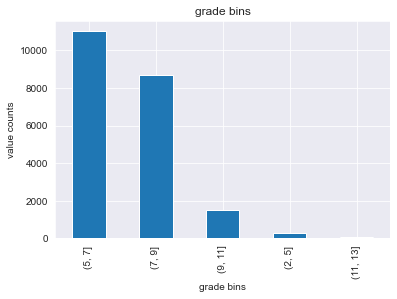

In [55]:
bins = [2, 5, 7, 9, 11, 13]
bin_grd = pd.cut(df3['grade'], bins)
bin_grd = bin_grd.cat.as_ordered()

bin_grd.value_counts().plot(kind='bar')
plt.title('grade bins')
plt.xlabel('grade bins')
plt.ylabel('value counts')

In [56]:
# now to afix this to our data frame and create dummies
df3['grade'] = bin_grd
df3['grade'] = df3['grade'].cat.codes
# Creating dummies
gbin_dummies = pd.get_dummies(bin_grd, prefix='grade') 

# again, keeping first column for now

df3 = df3.drop(['grade'], axis=1)
df3 = pd.concat([df3, gbin_dummies], axis=1)
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,sqft_above,yr_built,...,city,quad_1,quad_2,quad_3,quad_4,"grade_(2, 5]","grade_(5, 7]","grade_(7, 9]","grade_(9, 11]","grade_(11, 13]"
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,3,1180,55,...,Seattle,1,0,0,0,0,1,0,0,0
1,4060000240,2014-06-23,205425.0,2,1.00,880,6780,4,880,45,...,Seattle,1,0,0,0,0,1,0,0,0
2,4058801670,2014-07-17,445000.0,3,2.25,2100,8201,3,1620,67,...,Seattle,1,0,0,0,0,0,1,0,0
3,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,3,1300,61,...,Seattle,1,0,0,0,0,1,0,0,0
4,6874200960,2015-02-27,170000.0,2,1.00,860,5265,3,860,31,...,Seattle,1,0,0,0,0,1,0,0,0


In [57]:
df3 = df3.rename(columns={'grade_(2, 5]':'grd_1_to_5', 
                          'grade_(5, 7]':'grd_6_to_7', 
                           'grade_(7, 9]':'grd_8_to_9', 
                          'grade_(9, 11]':'grd_10_to_11', 
                           'grade_(11, 13]':'grd_12_to_13'})
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               21597 non-null  int64         
 1   date             21597 non-null  datetime64[ns]
 2   price            21597 non-null  float64       
 3   bedrooms         21597 non-null  int64         
 4   bathrooms        21597 non-null  float64       
 5   sqft_living      21597 non-null  int64         
 6   sqft_lot         21597 non-null  int64         
 7   condition        21597 non-null  int64         
 8   sqft_above       21597 non-null  int64         
 9   yr_built         21597 non-null  int8          
 10  zipcode          21597 non-null  int8          
 11  lat              21597 non-null  float64       
 12  long             21597 non-null  float64       
 13  sqft_living15    21597 non-null  int64         
 14  sqft_lot15       21597 non-null  int64

## Months

In [58]:
# Don't want 12 dummy variables for months. Binning according to 4 seasons
bins = [0, 3, 6, 9, 12]
b_mnth = pd.cut(df3['month'], bins)
b_mnth = b_mnth.cat.as_ordered()
b_mnth.head()

0    (9, 12]
1     (3, 6]
2     (6, 9]
3     (6, 9]
4     (0, 3]
Name: month, dtype: category
Categories (4, interval[int64]): [(0, 3] < (3, 6] < (6, 9] < (9, 12]]

Text(0.5, 1.0, 'Month Bins')

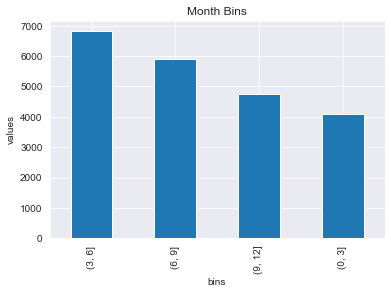

In [59]:
# Looks alright so far, lets plot and check see distribution
b_mnth.value_counts().plot(kind='bar')
plt.xlabel('bins')
plt.ylabel('values')
plt.title('Month Bins')

In [60]:
# Ok, as expected, between fall and spring you see a drop in sales. 
# Making dummies

df3['month']= b_mnth
df3['month'] = df3['month'].cat.codes
mnth_dummies = pd.get_dummies(b_mnth, prefix='season')
df4 = df3.drop(['month'], axis=1)
df4 = pd.concat([df4, mnth_dummies], axis=1)
df4.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,sqft_above,yr_built,...,quad_4,grd_1_to_5,grd_6_to_7,grd_8_to_9,grd_10_to_11,grd_12_to_13,"season_(0, 3]","season_(3, 6]","season_(6, 9]","season_(9, 12]"
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,3,1180,55,...,0,0,1,0,0,0,0,0,0,1
1,4060000240,2014-06-23,205425.0,2,1.00,880,6780,4,880,45,...,0,0,1,0,0,0,0,1,0,0
2,4058801670,2014-07-17,445000.0,3,2.25,2100,8201,3,1620,67,...,0,0,0,1,0,0,0,0,1,0
3,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,3,1300,61,...,0,0,1,0,0,0,0,0,1,0
4,6874200960,2015-02-27,170000.0,2,1.00,860,5265,3,860,31,...,0,0,1,0,0,0,1,0,0,0


In [61]:
# renaming columns for clarity

df4 = df4.rename(columns={'season_(0, 3]':'jan_mar', 
                            'season_(3, 6]':'apr_jun', 
                            'season_(6, 9]':'jul_sep', 
                            'season_(9, 12]':'oct_dec'})
df4 = df4.drop('date', axis=1)

## Condition 

In [62]:
# Getting dummies for condition 
cond_dummies = pd.get_dummies(df4['condition'], prefix='cond')

In [63]:
# adding to data frame 
df4 = pd.concat([df4, cond_dummies], axis=1)
df4.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'condition', 'sqft_above', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'waterfront_N', 'waterfront_Y',
       'not_renovated', 'is_renovated', 'floors_1', 'floors_2', 'floors_3',
       'floors_3_half', 'not_viewed', 'viewed', 'day_of_year', 'no_basement',
       'has_basement', 'total_home_sqft', 'city', 'quad_1', 'quad_2', 'quad_3',
       'quad_4', 'grd_1_to_5', 'grd_6_to_7', 'grd_8_to_9', 'grd_10_to_11',
       'grd_12_to_13', 'jan_mar', 'apr_jun', 'jul_sep', 'oct_dec', 'cond_1',
       'cond_2', 'cond_3', 'cond_4', 'cond_5'],
      dtype='object')

In [64]:
# renaming columns according to the definition of the rating given at 
# kingcounty.gov for clarity

df4 = df4.rename(columns={'cond_1':'cond_poor', 
                            'cond_2':'cond_fair', 
                            'cond_3':'cond_average', 
                            'cond_4':'cond_good',
                         'cond_5':'cond_very_good'})
df4 = df4.drop('condition', axis=1)


In [65]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21597 non-null  int64  
 1   price            21597 non-null  float64
 2   bedrooms         21597 non-null  int64  
 3   bathrooms        21597 non-null  float64
 4   sqft_living      21597 non-null  int64  
 5   sqft_lot         21597 non-null  int64  
 6   sqft_above       21597 non-null  int64  
 7   yr_built         21597 non-null  int8   
 8   zipcode          21597 non-null  int8   
 9   lat              21597 non-null  float64
 10  long             21597 non-null  float64
 11  sqft_living15    21597 non-null  int64  
 12  sqft_lot15       21597 non-null  int64  
 13  waterfront_N     21597 non-null  int32  
 14  waterfront_Y     21597 non-null  int32  
 15  not_renovated    21597 non-null  int32  
 16  is_renovated     21597 non-null  int32  
 17  floors_1    

In [66]:
df5 = df4.copy()

## Checking for Duplicates

In [67]:
# checking for duplicates using house id's as a reference
df5.id.duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

In [68]:
# calling back first data frame so we can look at any changes in price or date
dups = df[df.duplicated(['id'],keep=False)]
dups.groupby('id', axis=1)
dups

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_0.0,waterfront_1.0
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500,1,0
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500,1,0
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244,1,0
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244,1,0
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,0.0,0.0,...,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,0.0,0.0,...,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992,1,0
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598,1,0
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598,1,0
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,0.0,0.0,...,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000,1,0


In [69]:
# dates and prices change, indicating that the houses were sold more than 
# once. Creating  subset  of data to see if duplicates were purchased by 
# house flippers
flips = dups[['id', 'date', 'price', 'condition', 'grade']]
flips.head(20)

,id,date,price,condition,grade
93,6021501535,7/25/2014,430000.0,3,8
94,6021501535,12/23/2014,700000.0,3,8
313,4139480200,6/18/2014,1380000.0,3,11
314,4139480200,12/9/2014,1400000.0,3,11
324,7520000520,9/5/2014,232000.0,3,6
325,7520000520,3/11/2015,240500.0,3,6
345,3969300030,7/23/2014,165000.0,3,6
346,3969300030,12/29/2014,239900.0,3,6
371,2231500030,10/1/2014,315000.0,5,7
372,2231500030,3/24/2015,530000.0,5,7


Houses were bought at lower price and sold later at a higher price, but
**grade and condition stayed the same**. Grade and condition of these homes **did not** play a significant role in the sales of these homes. **Homes may not have been flipped**.

In [70]:
# To prevent noise in our data, will remove duplicates and keeping the most
# recent sale price

df5 = df5.drop_duplicates(subset='id', keep='last')
df5.duplicated(['id']).value_counts()

False    21420
dtype: int64

In [71]:
df5.isna().sum()

id                 0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
sqft_above         0
yr_built           0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
waterfront_N       0
waterfront_Y       0
not_renovated      0
is_renovated       0
floors_1           0
floors_2           0
floors_3           0
floors_3_half      0
not_viewed         0
viewed             0
day_of_year        0
no_basement        0
has_basement       0
total_home_sqft    0
city               0
quad_1             0
quad_2             0
quad_3             0
quad_4             0
grd_1_to_5         0
grd_6_to_7         0
grd_8_to_9         0
grd_10_to_11       0
grd_12_to_13       0
jan_mar            0
apr_jun            0
jul_sep            0
oct_dec            0
cond_poor          0
cond_fair          0
cond_average       0
cond_good          0
cond_very_good     0
dtype: int64

In [72]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21420 non-null  int64  
 1   price            21420 non-null  float64
 2   bedrooms         21420 non-null  int64  
 3   bathrooms        21420 non-null  float64
 4   sqft_living      21420 non-null  int64  
 5   sqft_lot         21420 non-null  int64  
 6   sqft_above       21420 non-null  int64  
 7   yr_built         21420 non-null  int8   
 8   zipcode          21420 non-null  int8   
 9   lat              21420 non-null  float64
 10  long             21420 non-null  float64
 11  sqft_living15    21420 non-null  int64  
 12  sqft_lot15       21420 non-null  int64  
 13  waterfront_N     21420 non-null  int32  
 14  waterfront_Y     21420 non-null  int32  
 15  not_renovated    21420 non-null  int32  
 16  is_renovated     21420 non-null  int32  
 17  floors_1    

## Fixing data types

I've noticed that I run into problems making models if features are dtype 'uint' or unsigned integers, which is why we're changing them.

In [73]:
for col in df5.columns:
    if df5[col].dtype == df5['cond_very_good'].dtype:
        df5[col] = df5[col].astype(int)
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21420 non-null  int64  
 1   price            21420 non-null  float64
 2   bedrooms         21420 non-null  int64  
 3   bathrooms        21420 non-null  float64
 4   sqft_living      21420 non-null  int64  
 5   sqft_lot         21420 non-null  int64  
 6   sqft_above       21420 non-null  int64  
 7   yr_built         21420 non-null  int8   
 8   zipcode          21420 non-null  int8   
 9   lat              21420 non-null  float64
 10  long             21420 non-null  float64
 11  sqft_living15    21420 non-null  int64  
 12  sqft_lot15       21420 non-null  int64  
 13  waterfront_N     21420 non-null  int32  
 14  waterfront_Y     21420 non-null  int32  
 15  not_renovated    21420 non-null  int32  
 16  is_renovated     21420 non-null  int32  
 17  floors_1    

# Exporting to CSV

In [74]:
df5.to_csv('csv_files/new_kc_house_data_clean_with_dummies2.csv')